 Hospital

In [18]:
import googlemaps

gmaps = googlemaps.Client(key='Your Key')

def calculate_driving_distance(row):

    apartment_coords = f"{row['Latitude_left']},{row['Longitude_left']}"
    
  
    mall_coords = f"{row['Mall_Latitude']},{row['Mall_Longitude']}"

    try:
        result = gmaps.distance_matrix(apartment_coords, mall_coords, mode='driving')
        distance_meters = result['rows'][0]['elements'][0]['distance']['value']  
        distance_km = distance_meters / 1000 
        return distance_km
    except Exception as e:
        print(f"Error calculating distance for {row['Address_left']}: {e}")
        return None

true_nearby_shopping['distance_to_mall'] = true_nearby_shopping.apply(calculate_driving_distance, axis=1)

print(true_nearby_shopping[['Address_left', 'distance_to_mall']].head())

/Users/liupeilin/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


                                        Address_left  distance_to_mall
4      123 Mossfiel Drive, Hoppers Crossing VIC 3029             2.119
5                  45 South Street, Belmont VIC 3216             1.190
8  317 Armstrong Street North, Soldiers Hill VIC ...             0.217
8  317 Armstrong Street North, Soldiers Hill VIC ...             0.217
9             16 Barcelona Street, Box Hill VIC 3128             1.467


/Users/liupeilin/Library/Python/3.9/lib/python/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [20]:
true_nearby_shopping['distance_to_mall']

4        2.119
5        1.190
8        0.217
8        0.217
9        1.467
         ...  
13441    1.473
13441    1.473
13441    1.473
13441    1.473
13441    1.473
Name: distance_to_mall, Length: 17869, dtype: float64

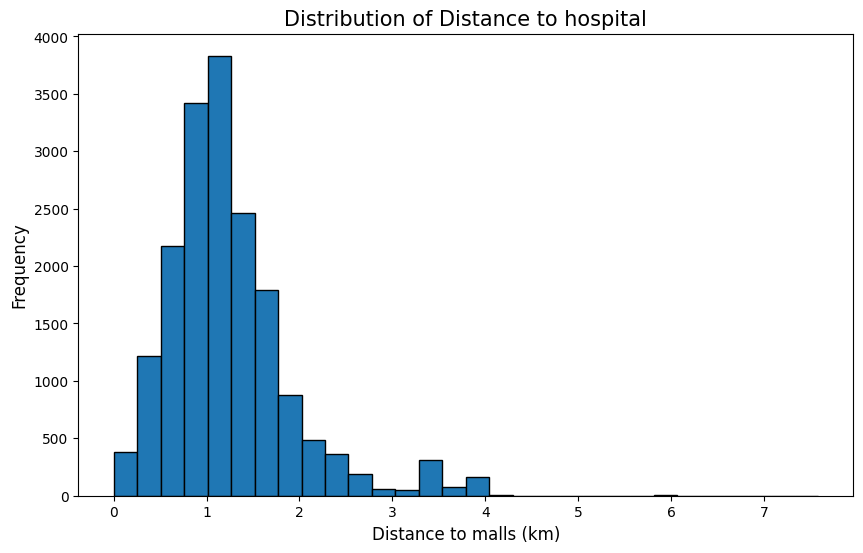

In [22]:
import matplotlib.pyplot as plt

# Generate a histogram showing the distribution of the distance_to_train columns
plt.figure(figsize=(10, 6))
plt.hist(true_nearby_shopping['distance_to_mall'], bins=30, edgecolor='black')

# Add a title and tag
plt.title('Distribution of Distance to hospital', fontsize=15)
plt.xlabel('Distance to malls (km)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# display graph
plt.show()


In [27]:
correlation = true_nearby_shopping[['Weekly Price', 'distance_to_mall']].corr()

print("Correlation between Weekly Price and Distance to hospital:")
print(correlation)

# Filter out data with Type 'Apartment'
apartment_data = true_nearby_shopping[true_nearby_shopping['Type'] == 'Apartment']

# calculate correlation
correlation_apartment = apartment_data[['Weekly Price', 'distance_to_mall']].corr()

print("Correlation between Weekly Price and Distance to Train 医院:")
print(correlation_apartment)

# Filter out data with Type 'House'
house_data = true_nearby_shopping[true_nearby_shopping['Type'] != 'Apartment']
correlation_house = house_data[['Weekly Price', 'distance_to_mall']].corr()

print("Correlation between Weekly Price and Distance to Train 医院:")
print(correlation_house)
house_data[['Weekly Price', 'distance_to_mall']].to_csv('distances.csv', index=False)

Correlation between Weekly Price and Distance to hospital:
                  Weekly Price  distance_to_mall
Weekly Price          1.000000          0.076577
distance_to_mall      0.076577          1.000000


In [125]:
# Filter out data with Type 'Apartment'
apartment_data = true_nearby_shopping[true_nearby_shopping['Type'] == 'Apartment']

# Calculate correlation
correlation_apartment = apartment_data[['Weekly Price', 'distance_to_mall']].corr()

# Rename 'distance_to_mall' to 'distance_to_hospital' for output display
correlation_apartment_renamed = correlation_apartment.rename(columns={'distance_to_mall': 'distance_to_hospital'}, index={'distance_to_mall': 'distance_to_hospital'})

print("Correlation between Weekly Price and Distance to Hospital:")
print(correlation_apartment_renamed)

Correlation between Weekly Price and Distance to Hospital:
                      Weekly Price  distance_to_hospital
Weekly Price              1.000000              0.106448
distance_to_hospital      0.106448              1.000000


In [127]:

house_data = true_nearby_shopping[true_nearby_shopping['Type'] != 'Apartment']
# Calculate correlation
correlation_apartment = house_data[['Weekly Price', 'distance_to_mall']].corr()

# Rename 'distance_to_mall' to 'distance_to_hospital' for output display
correlation_apartment_renamed = correlation_apartment.rename(columns={'distance_to_mall': 'distance_to_hospital'}, index={'distance_to_mall': 'distance_to_hospital'})

print("Correlation between Weekly Price and Distance to Hospital:")
print(correlation_apartment_renamed)

Correlation between Weekly Price and Distance to Hospital:
                      Weekly Price  distance_to_hospital
Weekly Price              1.000000              0.033078
distance_to_hospital      0.033078              1.000000
